## Central Limit Theorem Exercise

In [3]:
import pandas as pd
import numpy as np
# package with hypothesis tests
import scipy.stats as st
import matplotlib.pyplot as plt

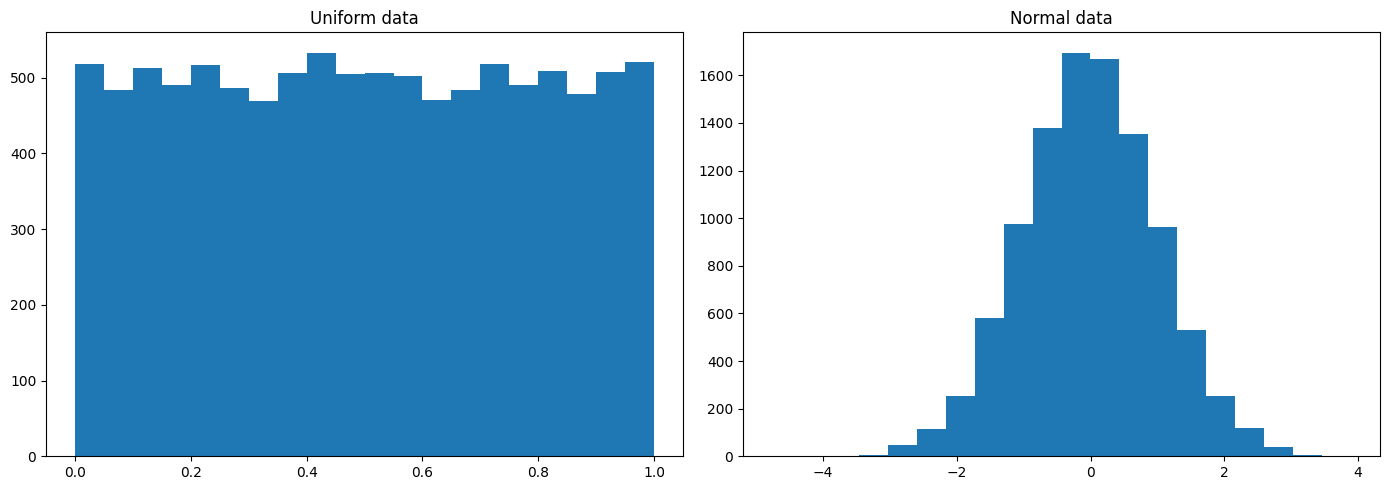

In [4]:
#
uniform = np.random.rand(10000)
normal = np.random.randn(10000)

fig = plt.figure(figsize=(14,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.hist(uniform, 20)
ax1.set_title('Uniform data')
ax2.hist(normal, 20)
ax2.set_title('Normal data')
fig.tight_layout()

### CLT - simulation

### How many samples do we need to take, so that the distribution of means for these samples will pass the shapiro-wilk test for normality if the population is from a Uniform or a Normal distribution?

+ Assume the population has 10,000 observation.
+ Assume sample size is always 50.

We will be suprised to see how fast the test passes for both distributions.

In [95]:
def shapiro_test(data, nsamples, test_done="Not specified", to_print=False, ntests=1, dist_of_means = 3, alpha = 0.05):

    """Check how many samples are required so that the distribution of means for those samples will pass the shapiro-wilk test for normality
    Parameters:
        data: Numpy randomized distribution
        nsamples: (integer) the size of the sample from the population sample
        test_done: (string) builds the string outlining which test done
        to_print: (boolean) whether to print or not, default is false, must be included as True for function to perate
        ntests: (integer) counter to record number of tests required for normality - default is 1
        mean_samples: (integer) Shapiro-Wilks test needs a minimum of 3 values to run
        alpha: (float) P-value threshold for signifigance - default is 0.05
    """

    # assigns variables for collecting p-values to test them over the total of samples
    # determines the random samples selected from the population

    allPValues = []
    list_of_means = []
    # random_samples = np.random.choice(data,size=nsamples)
    
    for i in range(dist_of_means):
        random_sample = np.random.choice(data,size=nsamples)
        list_of_means.append(np.mean(random_sample))

    p_value = st.shapiro(list_of_means)[1]

    print(p_value)
    
    if to_print:
        print('The results for the', test_done)

        # begin shapiro-wilks test, pulls a sample and tests, appends to list and determines mean of p-values

        while p_value <= alpha:
            random_sample = np.random.choice(data,size=nsamples)
            sample_mean = np.mean(random_sample)
            list_of_means.append(sample_mean)
            p_value = st.shapiro(list_of_means)[1]
            dist_of_means += 1           
    
    # output to identify successful test, or to highlight a break in loop if normality not reached.

    print(f'The number of distribution tests required to obtain normality was {dist_of_means}')
    print(f'P Value when normality was achieved = {p_value} \n')

In [110]:
uniform = np.random.rand(10000)
normal = np.random.randn(10000)
sample_size = 50

shapiro_test(uniform, sample_size, "uniform distribution were: \n",True)
shapiro_test(normal, sample_size, "normal distribution were: \n",True)

0.375882089138031
The results for the uniform distribution were: 

The number of distribution tests required to obtain normality was 3
P Value when normality was achieved = 0.375882089138031 

0.9508946537971497
The results for the normal distribution were: 

The number of distribution tests required to obtain normality was 3
P Value when normality was achieved = 0.9508946537971497 

